# Association between patient features and thrombolysis use

## Aims

Replicate SAMueL-1 analysis [available to view here.](https://samuel-book.github.io/samuel-1/descriptive_stats/04_thrombolysis_general.html)

Examines thrombolysis use by various characteristics for (A) all arrivals and (B) arrivals within 4 hours of known stroke onset.

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Set max rows when display dataframe
pd.set_option('display.max_rows', 100)

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'
    admission_only_filename = 'reformatted_data_admissions_only.csv'


paths = Paths()

In [3]:
# Load data
data = pd.read_csv(os.path.join(paths.data_path,
                                paths.data_filename))
data_full = pd.read_csv(os.path.join(paths.data_path,
                                     paths.admission_only_filename))

## Thrombolysis use by different variables

In [4]:
def plot_ivt_differences(plot_type, column, label):
    '''
    Finds the proportion of individuals who received thrombolysis by the
    chosen characteristic, and creates a plot to summarise that
    plot_type = string, either line or bar
    column = string, column of interest
    label = string, describes the column and used on plot
    '''
    # Proportion of individuals receiving thrombolysis by characteristic
    all = 'All arrivals'
    four = 'Arrive within 4 hours\nof known stroke onset'
    ivt_group = pd.concat([
        data_full.groupby(column)['thrombolysis'].mean().rename(all),
        data.groupby(column)['thrombolysis'].mean().rename(four)],
        axis=1)*100

    # Plot those proportions
    fig, ax = plt.subplots(figsize=(5, 5))
    if plot_type == 'line':
        ax.plot(ivt_group, marker='o')
        ax.legend(ax.get_lines(), ivt_group.columns, loc='best',
                  title='Patients', ncol=1)
        ax.set_xlabel(label)
        ax.set_ylabel('Thrombolysis use (%)')
        ax.grid()
    elif plot_type == 'bar':
        ivt_group.plot(kind='bar', ax=ax)
        ax.legend(ivt_group.columns, loc='best',
                  title='Patients', ncol=1)
        ax.set_xlabel(label)
        ax.set_ylabel('Thrombolysis use (%)')
    plt.show()

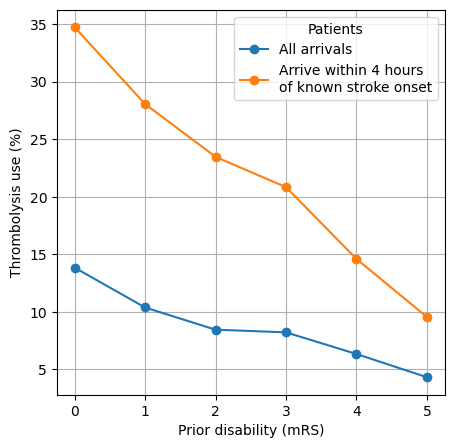

In [5]:
plot_ivt_differences('line', 'prior_disability', 'Prior disability (mRS)')

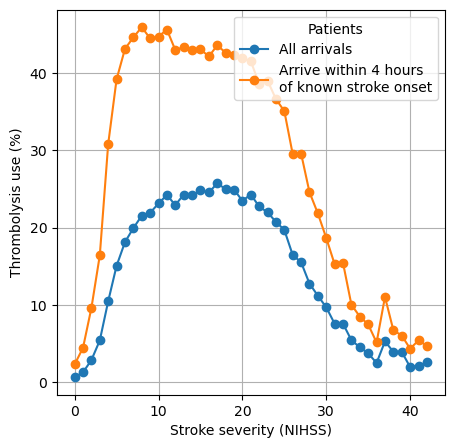

In [6]:
plot_ivt_differences('line', 'stroke_severity', 'Stroke severity (NIHSS)')

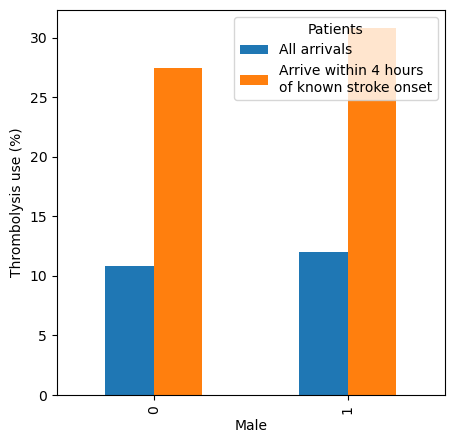

In [7]:
plot_ivt_differences('bar', 'male', 'Male')

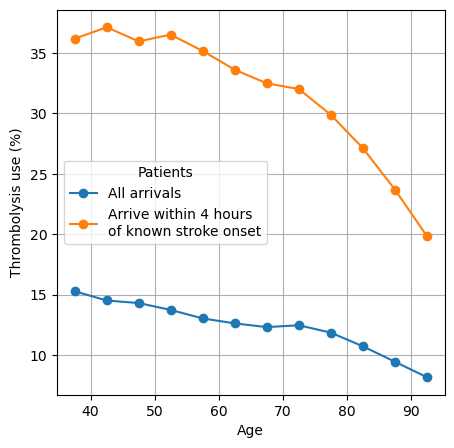

In [8]:
plot_ivt_differences('line', 'age', 'Age')

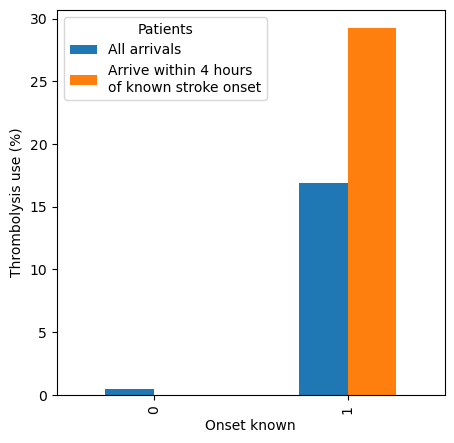

In [9]:
# Note: due to data cleaning, not possible to arrive within 4 hours
# of known stroke onset, as we set their onset to arrival times as missing
plot_ivt_differences('bar', 'onset_known', 'Onset known')

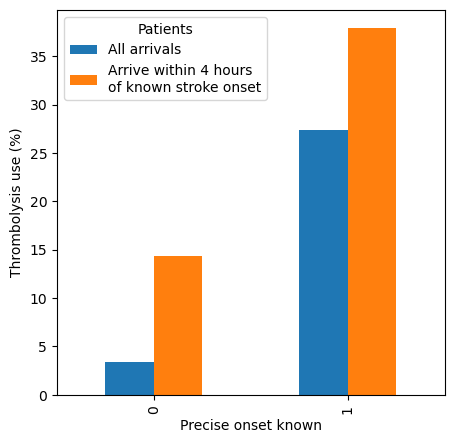

In [10]:
# Note: This compare precise onset, against best + unknown
plot_ivt_differences('bar', 'precise_onset_known', 'Precise onset known')

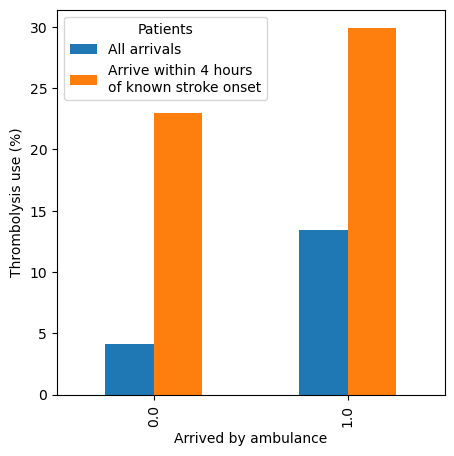

In [11]:
plot_ivt_differences('bar', 'arrive_by_ambulance', 'Arrived by ambulance')